In [1]:

from ai4water.eda import EDA
from ai4water.datasets import CAMELS_CL
from ai4water.utils.utils import get_version_info

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from easy_mpl import hist, ridge
from easy_mpl import scatter
from easy_mpl.utils import process_cbar


**********Tensorflow models could not be imported **********



C:\Users\ather\.conda\envs\cat_aware\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
for k,v in get_version_info().items():
    print(k, v)

python 3.8.17 (default, Jul  5 2023, 20:44:21) [MSC v.1916 64 bit (AMD64)]
os nt
ai4water 1.07
easy_mpl 0.21.3
SeqMetrics 1.3.4
numpy 1.24.3
pandas 1.3.4
matplotlib 3.6.0
sklearn 1.3.0
xarray 0.20.1
netCDF4 1.5.7
seaborn 0.12.2


In [3]:
dataset = CAMELS_CL(
    path=r"D:\data\CAMELS_CL"    # set path to None if you have not already downloaded data
)


In [4]:
dataset.start

'19130215'

In [5]:
dataset.end

'20180309'

In [6]:
stations = dataset.stations()
len(stations)

516

## Static Data

In [7]:
dataset.static_features

['gauge_name',
 'gauge_lat',
 'gauge_lon',
 'record_period_start',
 'record_period_end',
 'n_obs',
 'area',
 'elev_gauge',
 'elev_mean',
 'elev_med',
 'elev_max',
 'elev_min',
 'slope_mean',
 'nested_inner',
 'nested_outer',
 'location_type',
 'geol_class_1st',
 'geol_class_1st_frac',
 'geol_class_2nd',
 'geol_class_2nd_frac',
 'carb_rocks_frac',
 'crop_frac',
 'nf_frac',
 'fp_frac',
 'grass_frac',
 'shrub_frac',
 'wet_frac',
 'imp_frac',
 'lc_barren',
 'snow_frac',
 'lc_glacier',
 'fp_nf_index',
 'forest_frac',
 'dom_land_cover',
 'dom_land_cover_frac',
 'land_cover_missing',
 'p_mean_cr2met',
 'p_mean_chirps',
 'p_mean_mswep',
 'p_mean_tmpa',
 'pet_mean',
 'aridity_cr2met',
 'aridity_chirps',
 'aridity_mswep',
 'aridity_tmpa',
 'p_seasonality_cr2met',
 'p_seasonality_chirps',
 'p_seasonality_mswep',
 'p_seasonality_tmpa',
 'frac_snow_cr2met',
 'frac_snow_chirps',
 'frac_snow_mswep',
 'frac_snow_tmpa',
 'high_prec_freq_cr2met',
 'high_prec_freq_chirps',
 'high_prec_freq_mswep',
 'high

In [8]:
hfd = ''

In [9]:
static = dataset.fetch_static_features(stn_id=stations)
static.shape

(516, 104)

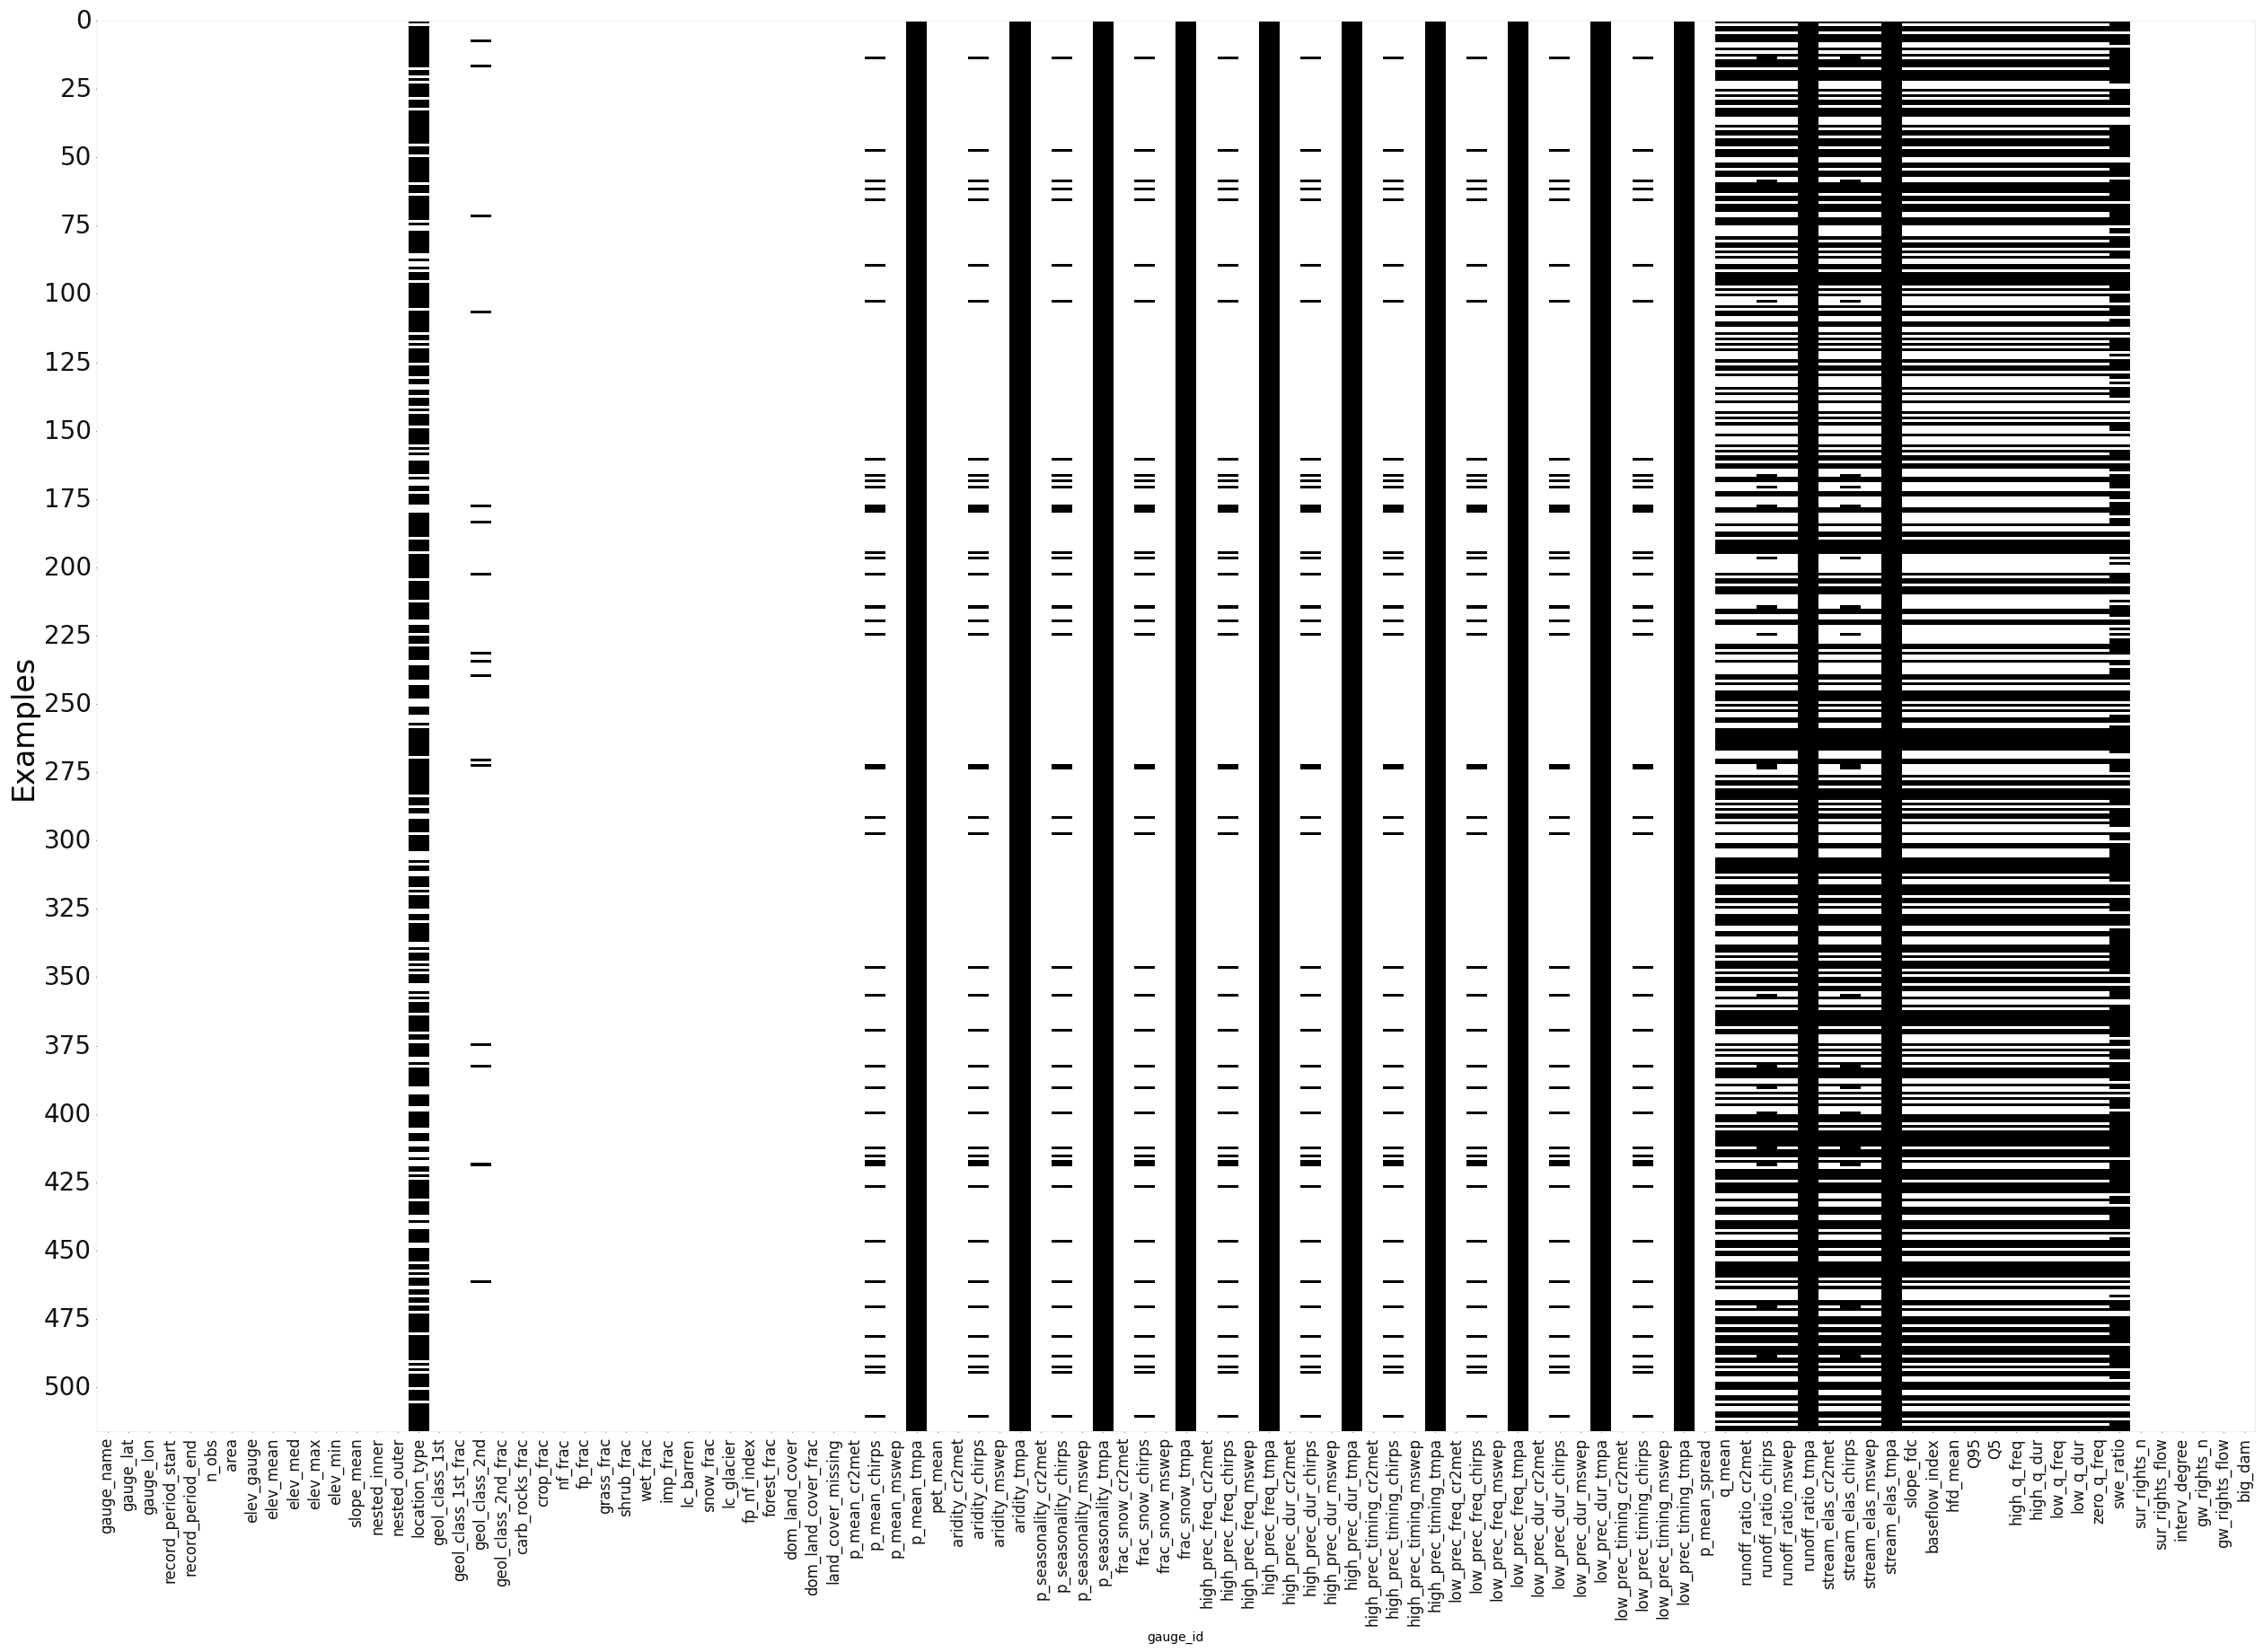

<AxesSubplot: xlabel='gauge_id', ylabel='Examples'>

In [10]:
EDA(data=static, save=False).heatmap()

In [11]:
static = static.dropna(axis=1)
static.shape

(516, 62)

In [12]:
physical_features = []
soil_features = []
geological_features = []
flow_characteristics = []

In [13]:
lat = static['gauge_lat'].values.reshape(-1,)
long = static['gauge_lon'].values.reshape(-1,)

29


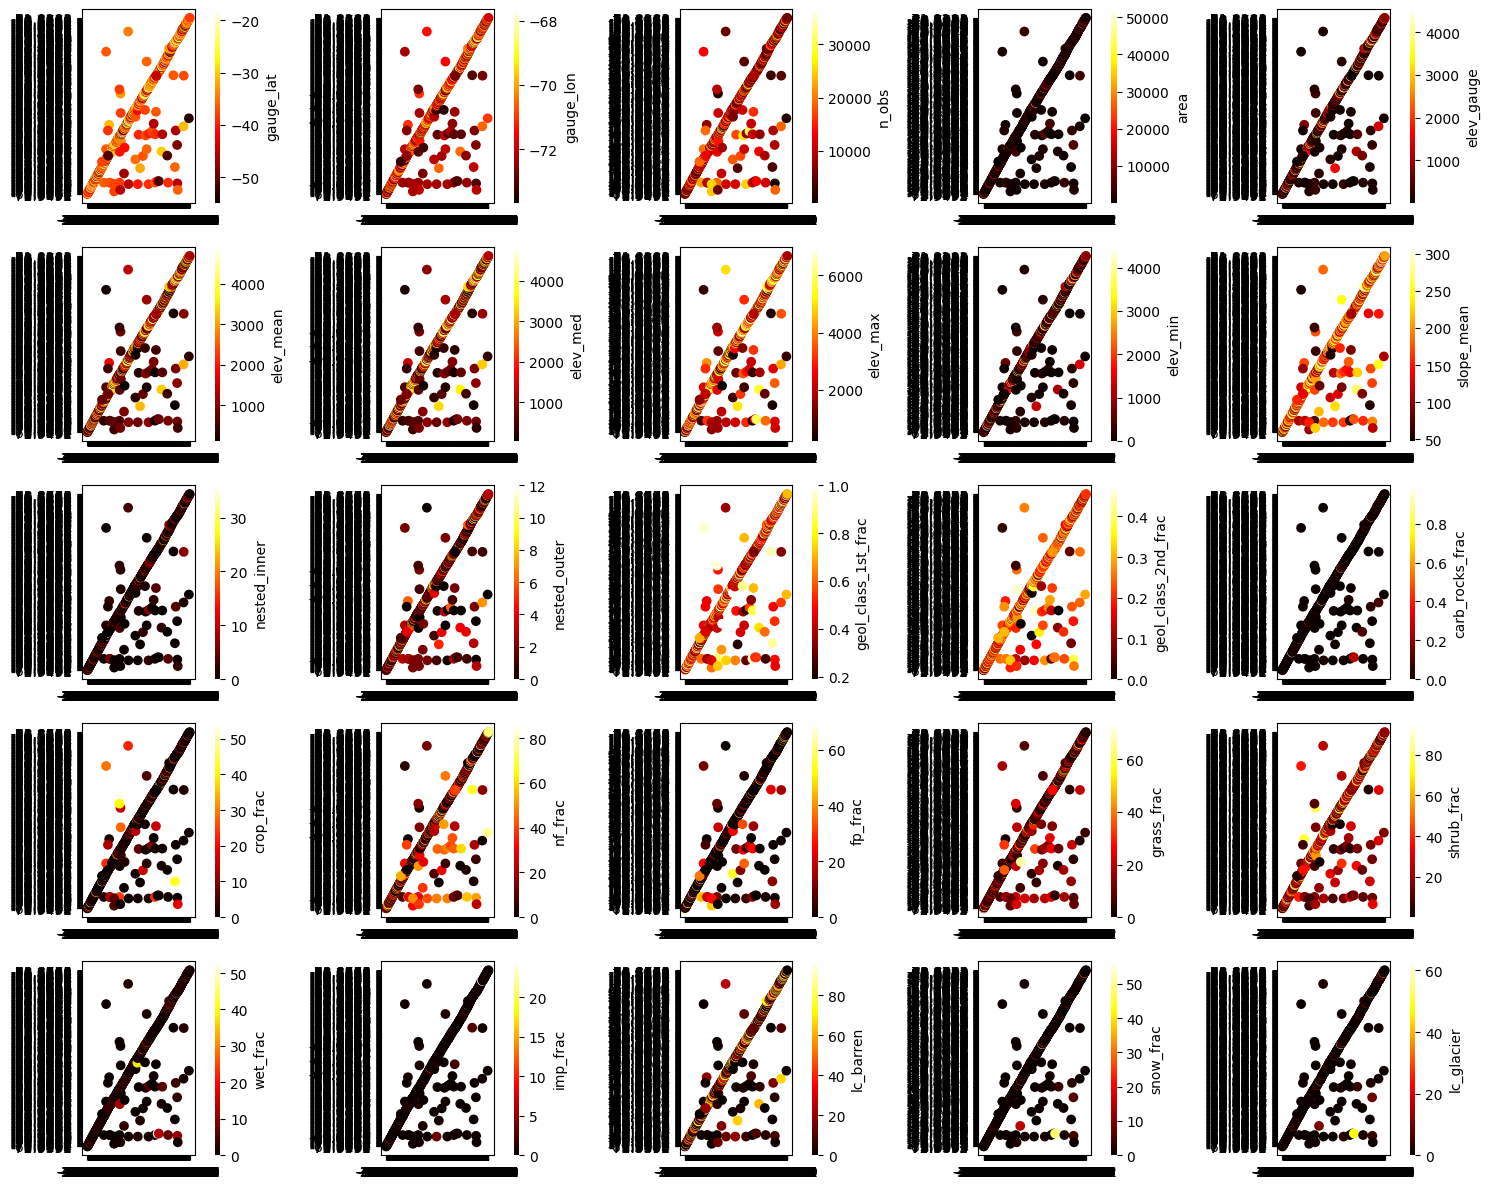

In [14]:
idx = 0
ax_num = 0

fig, axes = plt.subplots(5, 5, figsize=(15, 12))
axes = axes.flatten()

while ax_num < 25 and idx<static.shape[1]:
    
    val = static.iloc[:, idx]
    idx += 1
    
    try:
        c = val.astype(float).values.reshape(-1,)
             
        en = static.shape[0]
        ax = axes[ax_num]
        ax, sc = scatter(lat[0:en], long[0:en], c=c[0:en], cmap="hot", show=False, ax=ax) 

        process_cbar(ax, sc, border=False, title=val.name, #title_kws ={"fontsize": 14}
                    )
        ax_num += 1
    except ValueError:
        continue
    

print(idx)
plt.tight_layout()
plt.show()

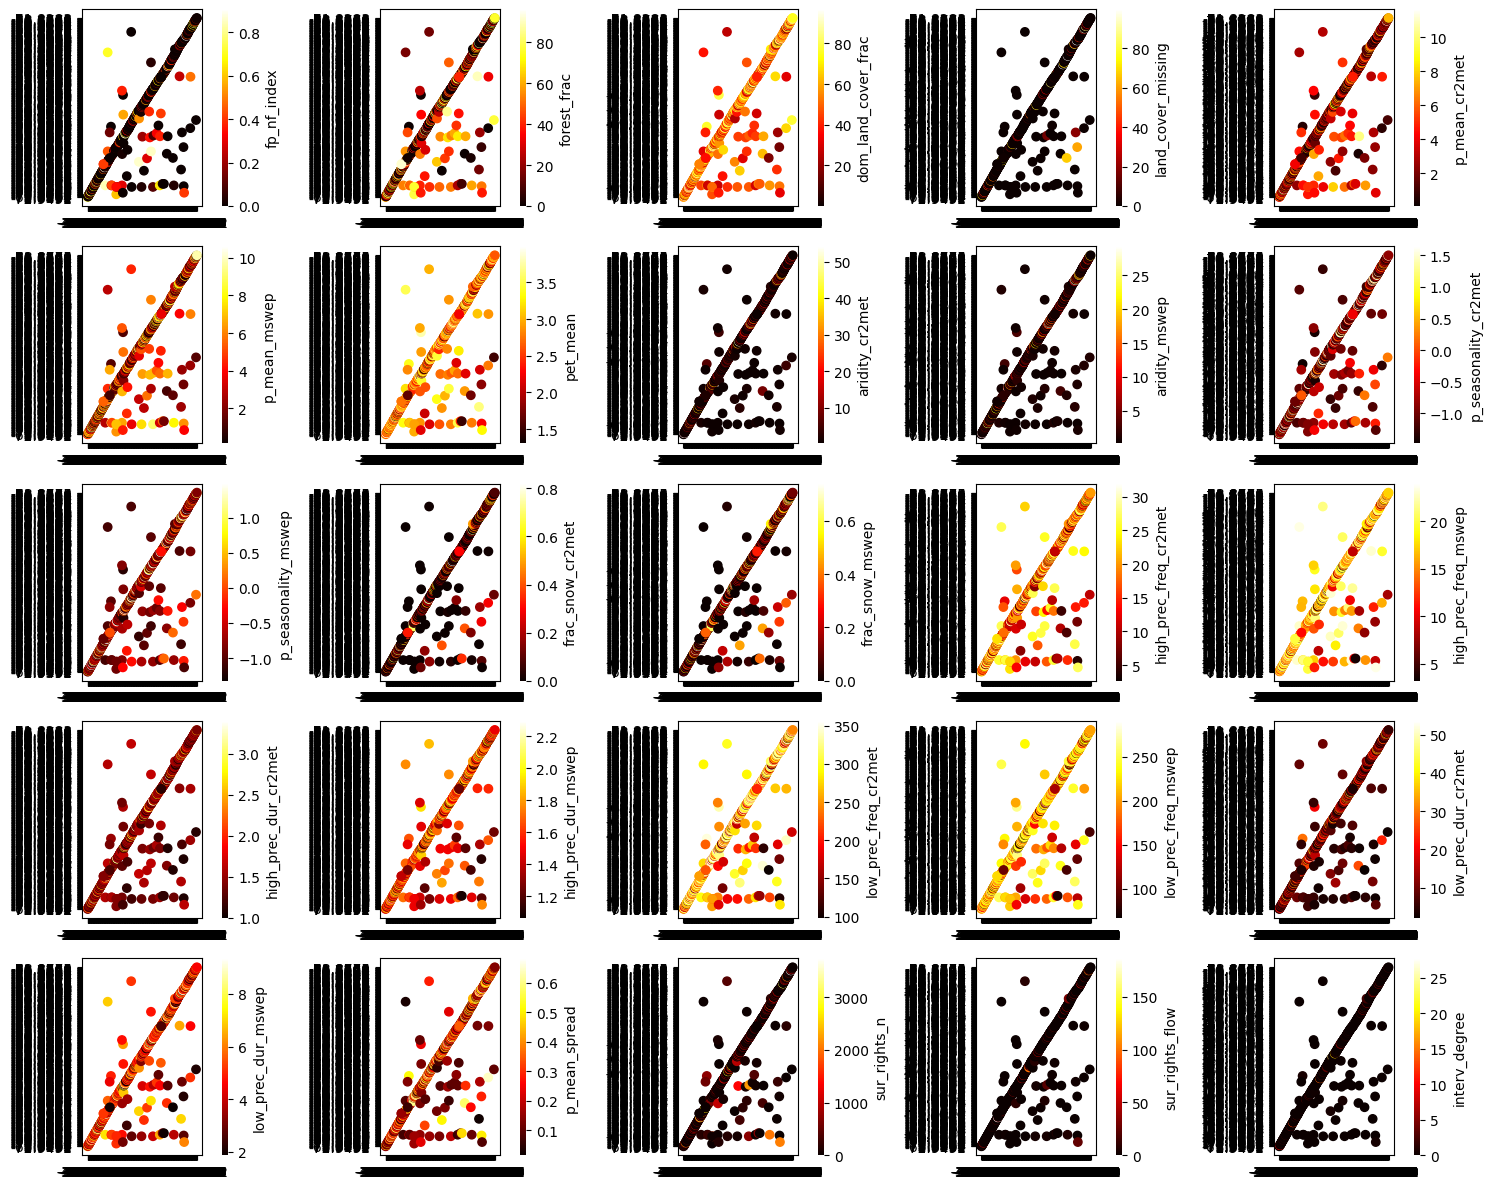

59


In [15]:
idx = 29
ax_num = 0

fig, axes = plt.subplots(5, 5, figsize=(15, 12))
axes = axes.flatten()

while ax_num < 25 and idx<static.shape[1]:
    
    val = static.iloc[:, idx]
    idx += 1
    
    try:
        c = val.astype(float).values.reshape(-1,)
             
        en = static.shape[0]
        ax = axes[ax_num]
        ax, sc = scatter(lat[0:en], long[0:en], c=c[0:en], cmap="hot", show=False, ax=ax) 

        process_cbar(ax, sc, border=False, title=val.name, #title_kws ={"fontsize": 14}
                    )
        ax_num += 1
    except ValueError:
        continue
    


plt.tight_layout()
plt.show()
print(idx)

In [16]:
print(idx)
#val.astype('float')
#scatter(lat.values, long.values, c=val.astype('float').values.reshape(-1,))
val

59


8220009      0.011646446291
10362001     0.054343679672
7317005      0.000398868526
2112005      9.782030175986
5746001      0.222243088105
                 ...       
5101001      0.000000000000
10401001     0.039348651098
2110002      1.910341017694
8350001      0.000000000000
11315001     0.022692805213
Name: interv_degree, Length: 516, dtype: object

## Dynamic Features

In [4]:
dataset.dynamic_features

['streamflow_m3s',
 'streamflow_mm',
 'precip_cr2met',
 'precip_chirps',
 'precip_mswep',
 'precip_tmpa',
 'tmin_cr2met',
 'tmax_cr2met',
 'tmean_cr2met',
 'pet_8d_modis',
 'pet_hargreaves',
 'swe']

In [5]:
# difference betwen different pcp ???
# meaning of gleam ???

In [7]:
streamflow = dataset.fetch(dynamic_features = 'streamflow_m3s', as_dataframe=True)
streamflow = streamflow.reset_index()
streamflow.index = pd.to_datetime(streamflow.pop('time'))
streamflow.pop('dynamic_features')
print(streamflow.shape)
_ = EDA(data=streamflow, save=False).heatmap()

(38374, 516)


<AxesSubplot: ylabel='Examples'>

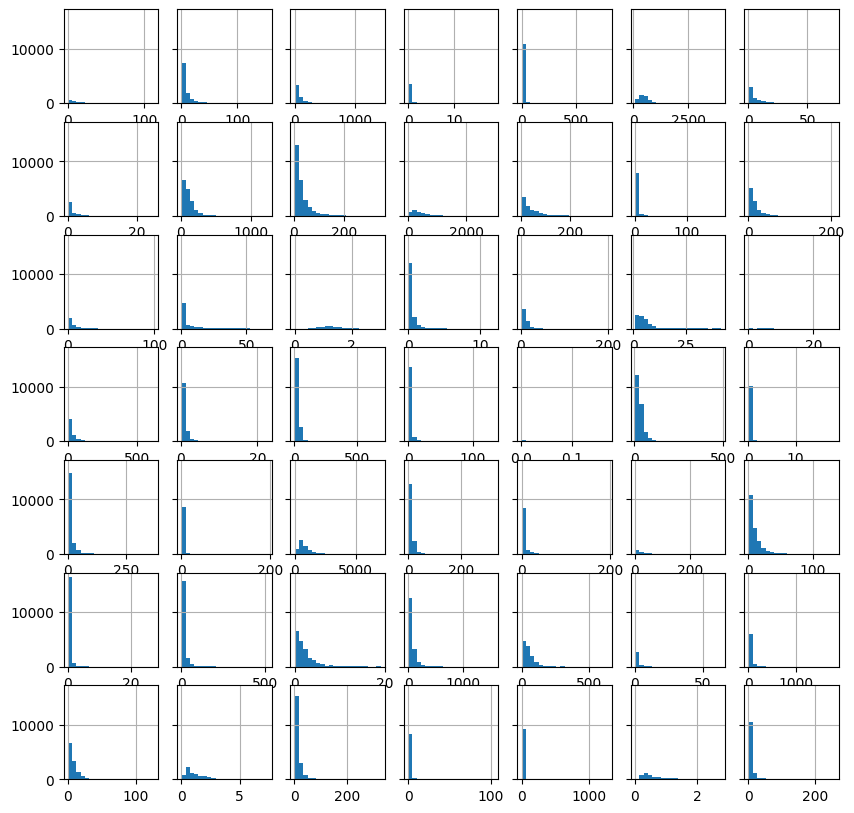

49


In [8]:
st = 0

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    
    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

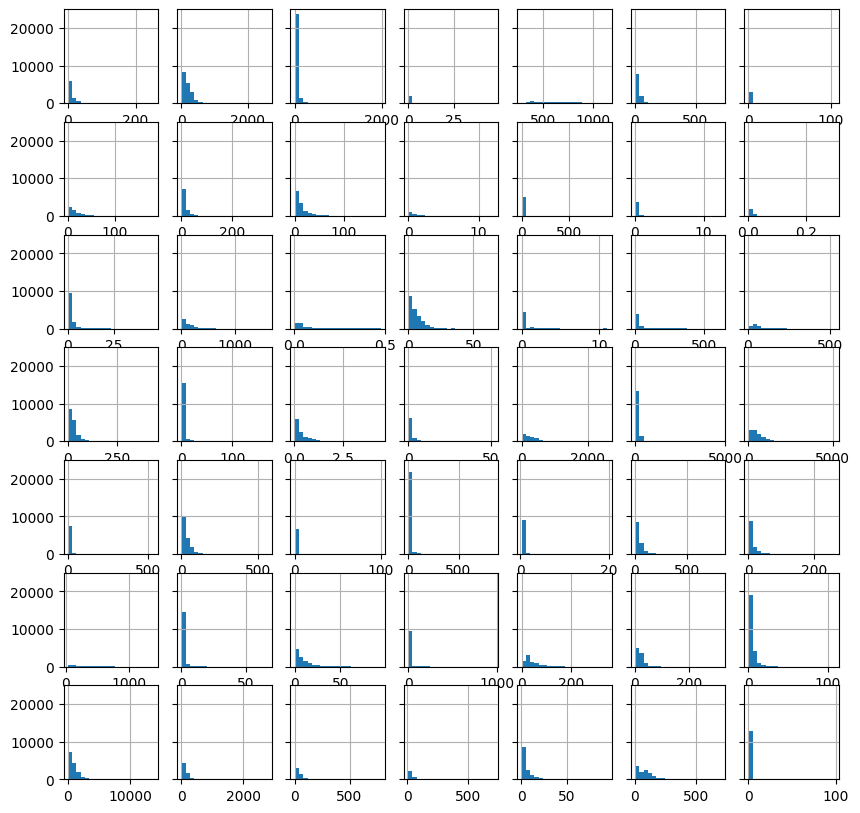

98


In [9]:
st = 49

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    
    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

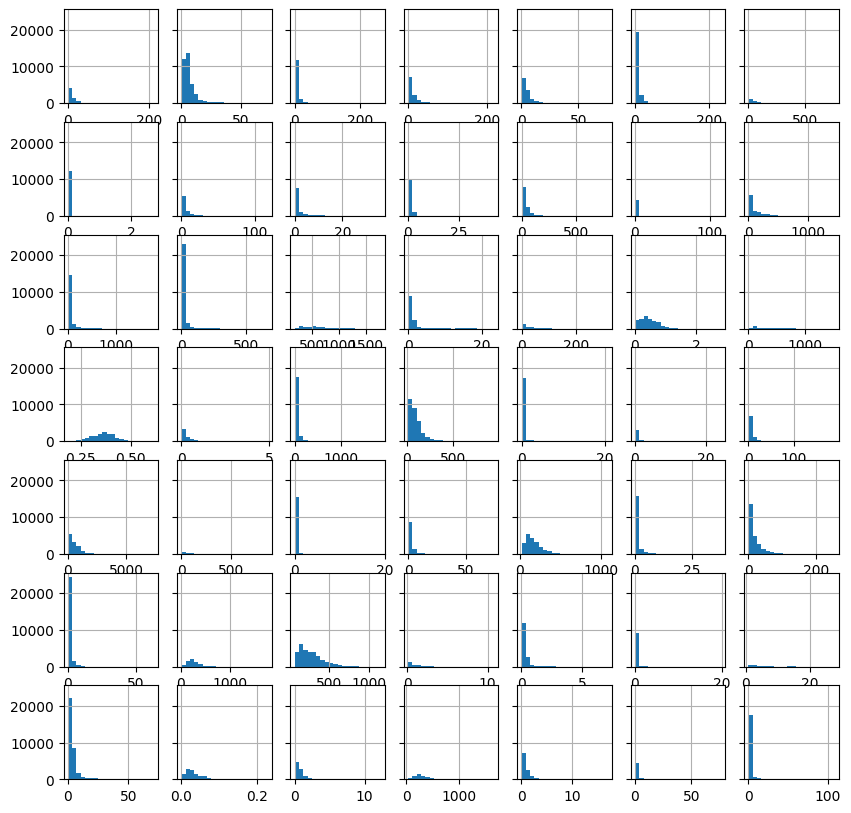

147


In [10]:
st = 98

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    
    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

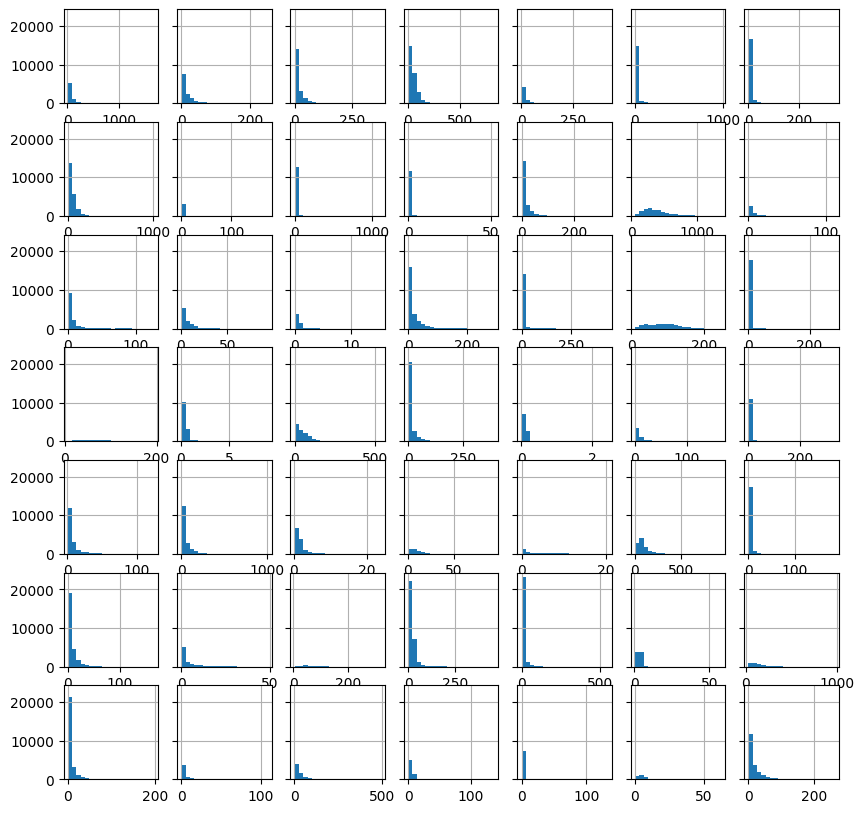

196


In [11]:
st = 147

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    
    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

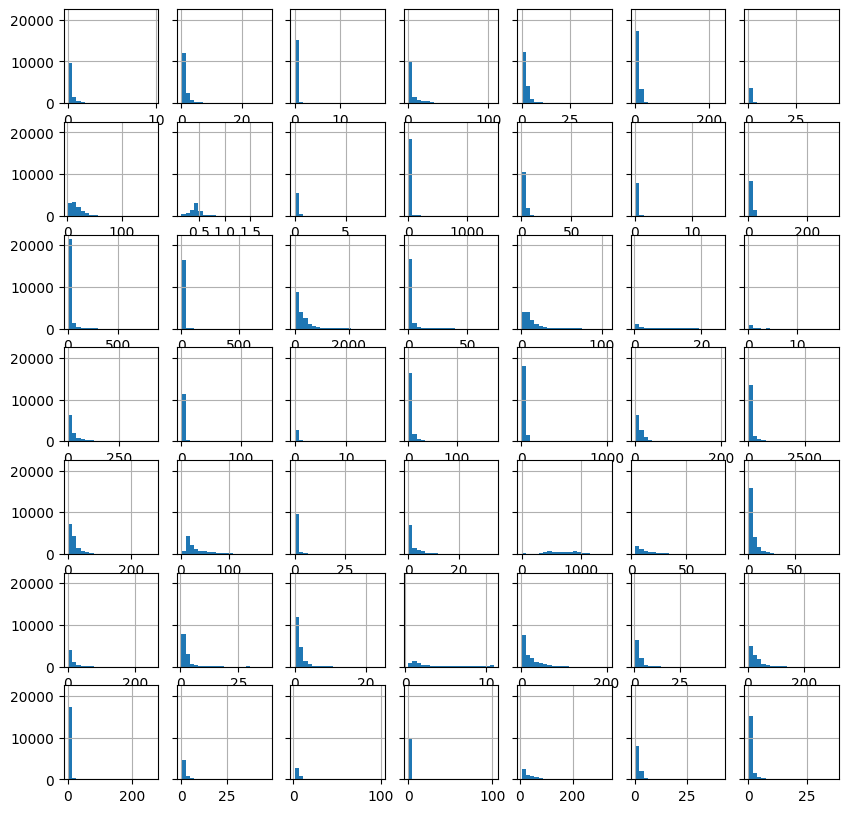

245


In [12]:
st = 196

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
     bins=20,
     ax=ax,
     show=False
    )
    
    idx += 1

plt.show()
print(idx)

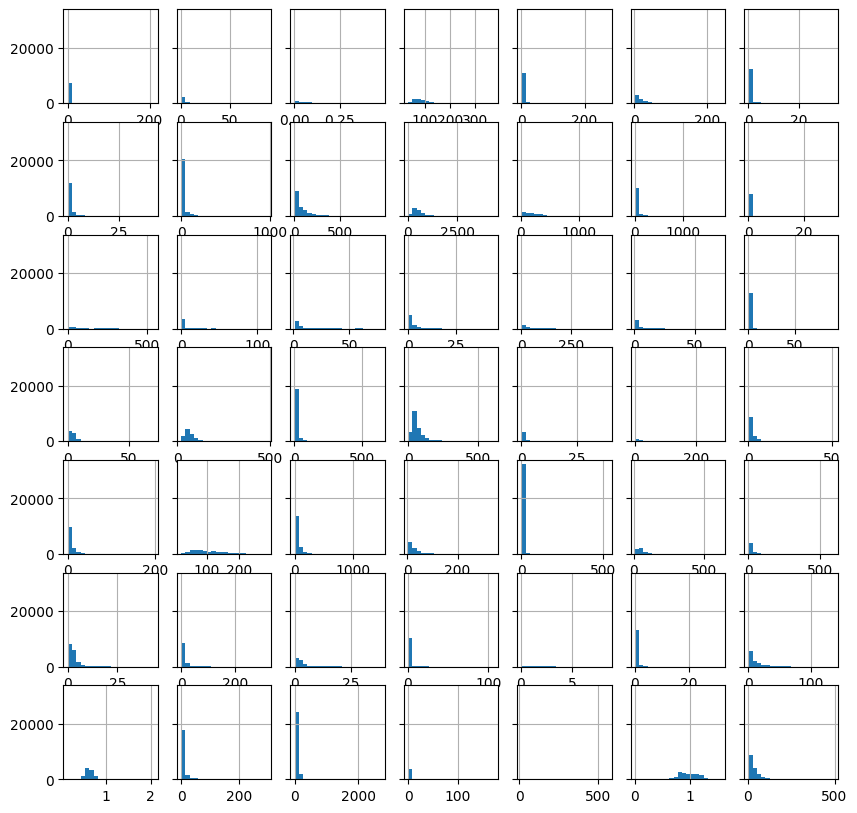

294


In [13]:
st = 245

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
     bins=20,
     ax=ax,
     show=False
    )
    
    idx += 1

plt.show()
print(idx)

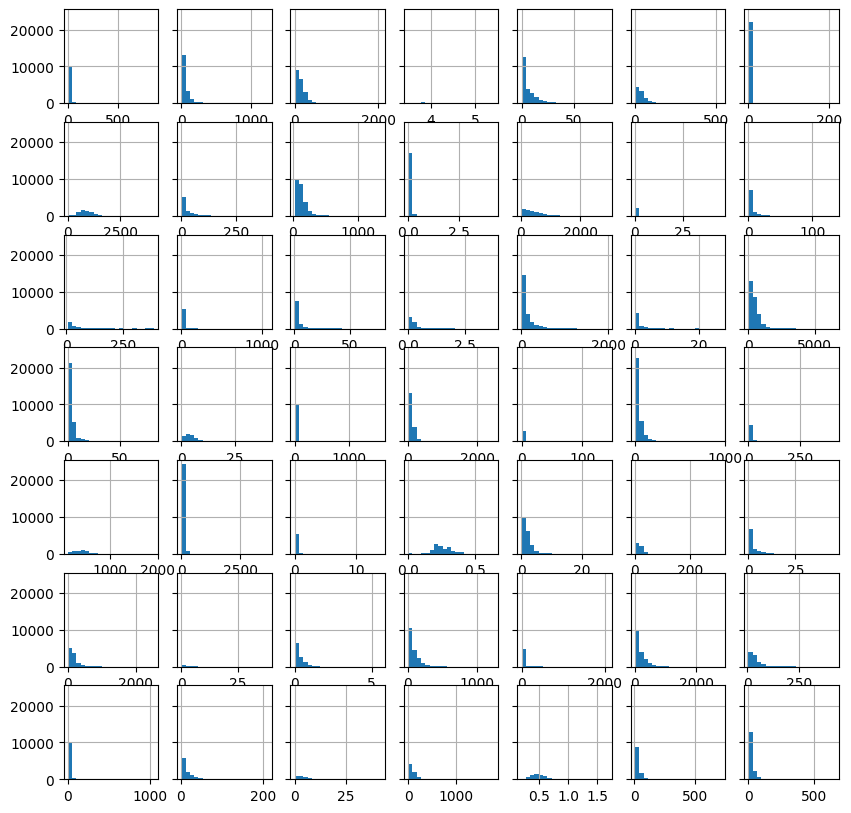

343


In [14]:
st = 294

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
     bins=20,
     ax=ax,
     show=False
    )
    
    idx += 1

plt.show()
print(idx)

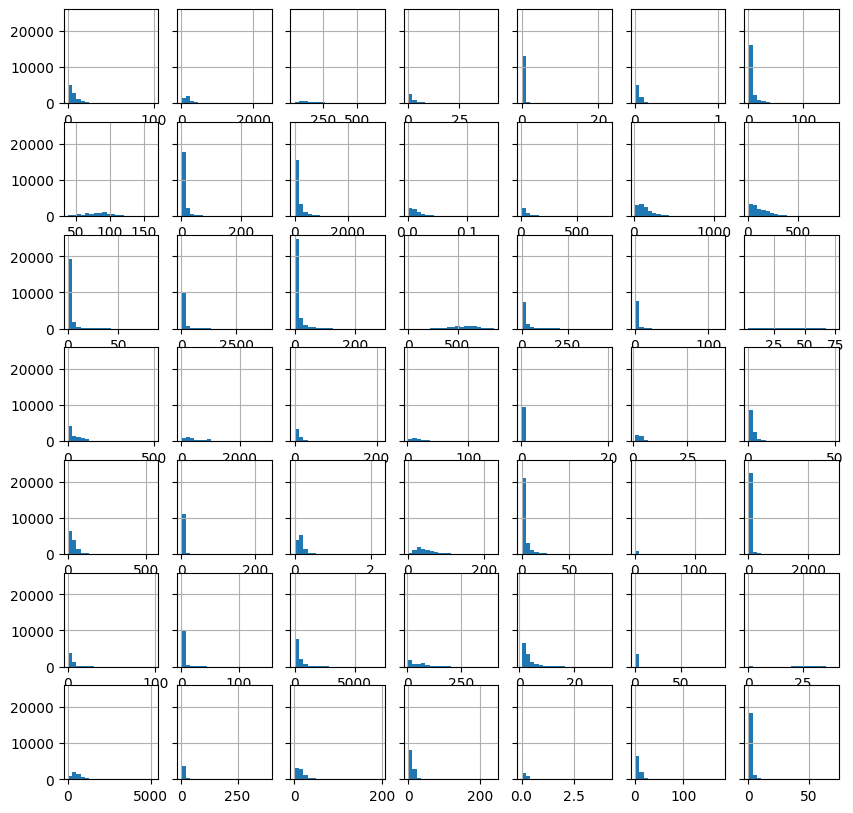

392


In [15]:
st = 343

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
     bins=20,
     ax=ax,
     show=False
    )
    
    idx += 1

plt.show()
print(idx)

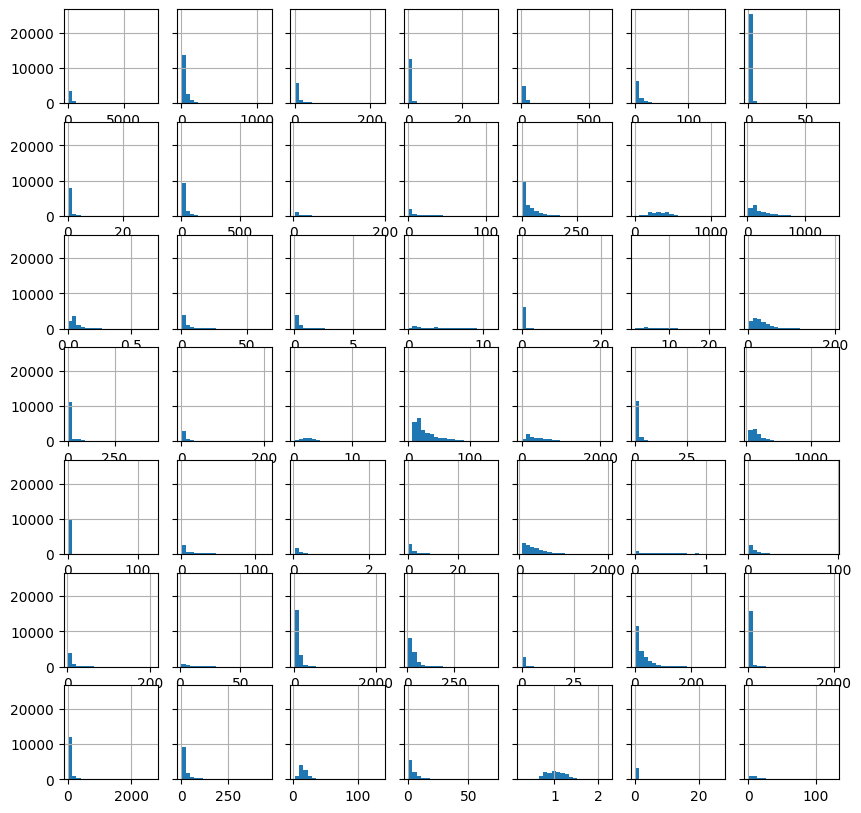

441


In [16]:
st = 392

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
     bins=20,
     ax=ax,
     show=False
    )
    
    idx += 1

plt.show()
print(idx)

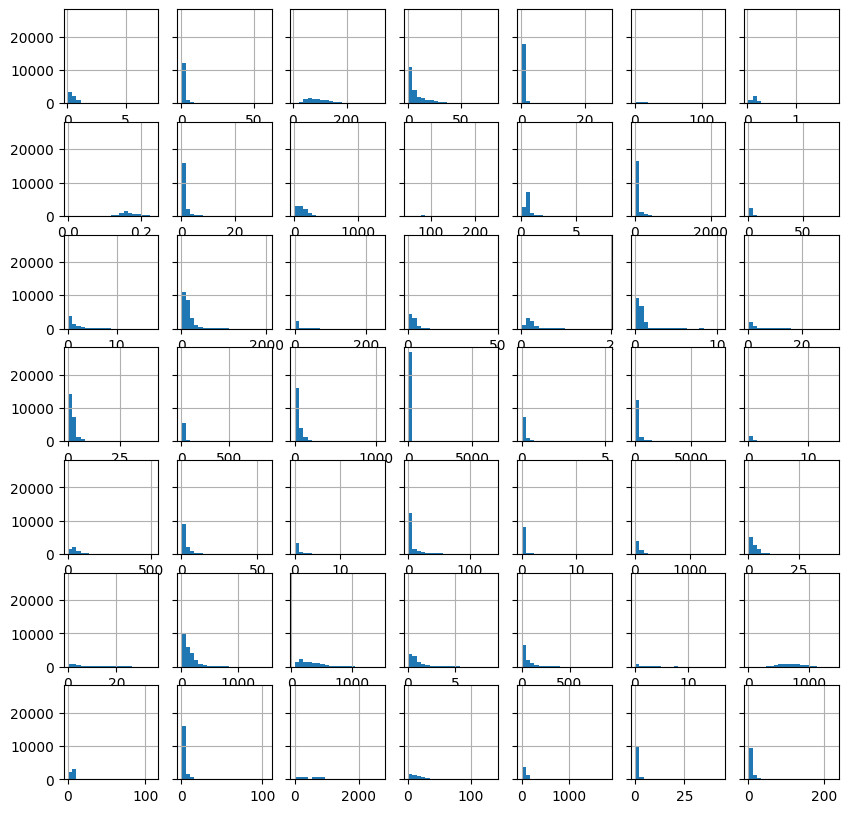

490


In [17]:
st = 441

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
     bins=20,
     ax=ax,
     show=False
    )
    
    idx += 1

plt.show()
print(idx)

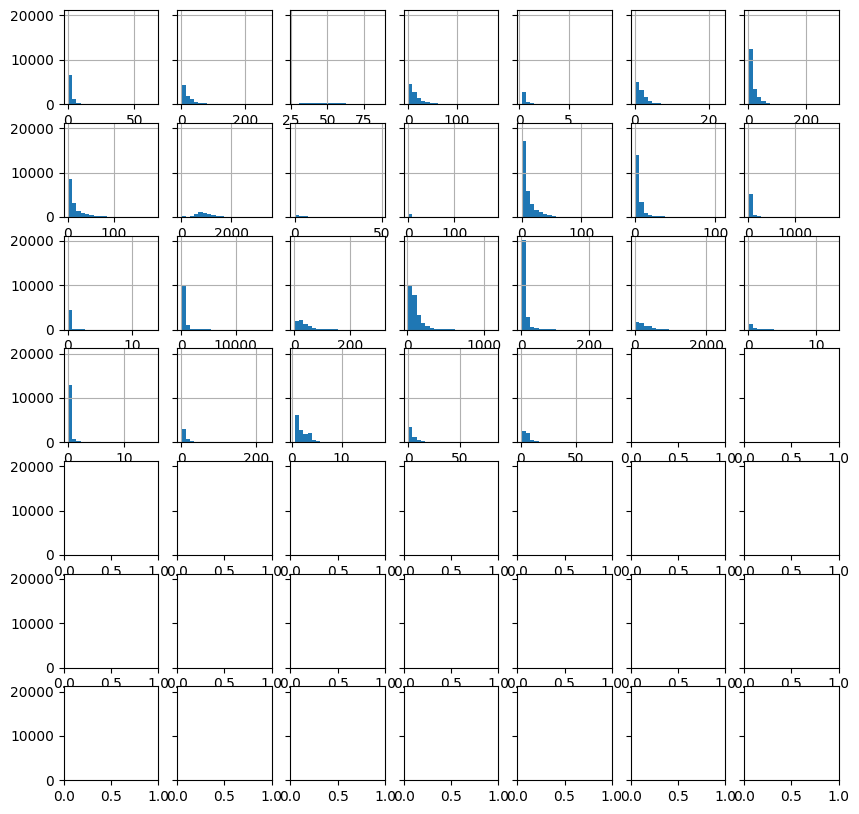

516


In [18]:
st = 490

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    

    if idx>=516:
        break

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
     bins=20,
     ax=ax,
     show=False
    )
    
    idx += 1

plt.show()
print(idx)

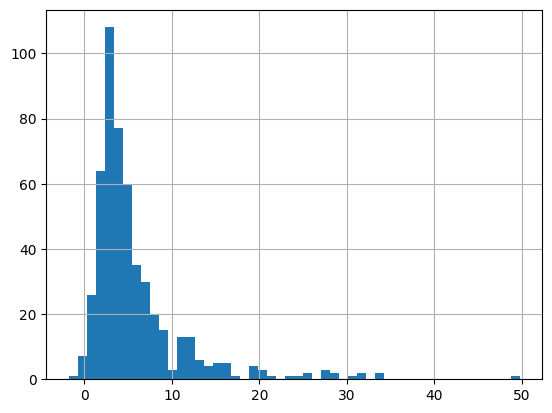

In [19]:
# skewness of streamflow

_ = hist(streamflow.skew().values.reshape(-1,), bins=50)

### potential evapotranspiration

In [20]:
pet = dataset.fetch(dynamic_features = 'pet_hargreaves', as_dataframe=True)
pet = pet.reset_index()
pet.index = pd.to_datetime(pet.pop('time'))
pet.pop('dynamic_features')
print(pet.shape) 
EDA(data=pet, save=False).heatmap()

(38374, 516)


<AxesSubplot: ylabel='Examples'>

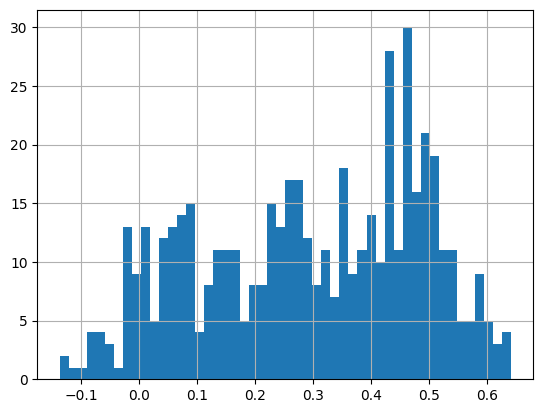

In [21]:
_ = hist(pet.skew().values.reshape(-1,), bins=50)

### Air Temperature

In [23]:
import gc
gc.collect()

2728

In [4]:


temp = dataset.fetch(dynamic_features = 'tmean_cr2met', as_dataframe=True)
temp = temp.reset_index()
temp.index = pd.to_datetime(temp.pop('time'))
temp.pop('dynamic_features') 

print(temp.shape)

EDA(data=temp, save=False).heatmap()

(38374, 516)


<AxesSubplot: ylabel='Examples'>

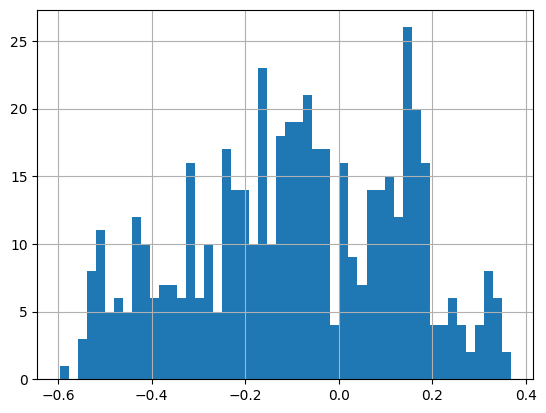

In [5]:

_ = hist(temp.skew().values.reshape(-1,), bins=50)

### Precipitation


In [6]:
pcp = dataset.fetch(dynamic_features = 'precip_mswep', as_dataframe=True)
pcp = pcp.reset_index()
pcp.index = pd.to_datetime(pcp.pop('time'))
pcp.pop('dynamic_features')
print(pcp.shape) 
EDA(data=pcp, save=False).heatmap()

(38374, 516)


<AxesSubplot: ylabel='Examples'>

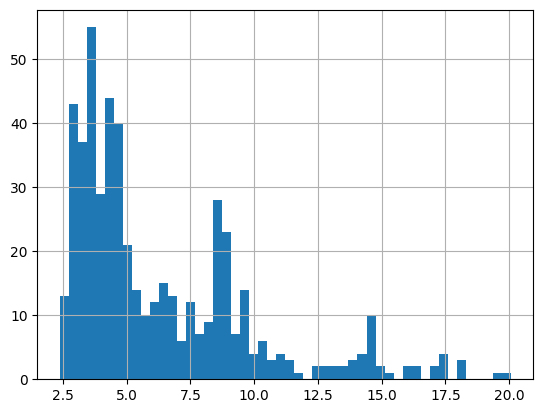

In [7]:
_ = hist(pcp.skew().values.reshape(-1,), bins=50)